<a href="https://colab.research.google.com/github/ishmeetsinghsaini11/nyc-taxi-fare-prediction/blob/main/(model_train_and_evaluation)New_York_City_Taxi_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import already analysed parquet data


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import Pipeline

In [ ]:
train_df = pd.read_parquet('train.parquet')

In [ ]:
train_df.head()

,fare_amount,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
430806,4.9,1.0,2010,6,16,2,11,1.246941
98653,18.5,2.0,2012,7,30,0,20,5.215192
137682,10.0,1.0,2013,3,1,4,8,2.471029
112411,4.0,1.0,2013,9,10,1,22,0.458735
484160,9.7,1.0,2010,4,30,4,9,2.728379


In [ ]:
val_df = pd.read_parquet('val.parquet')

In [ ]:
val_df.head()

,fare_amount,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
251895,6.9,5.0,2009,9,13,6,10,2.136661
60212,29.3,1.0,2009,2,22,6,14,12.721812
207126,4.1,1.0,2010,4,29,3,22,0.991377
266232,3.7,1.0,2012,8,18,5,4,0.780469
391660,10.1,1.0,2012,4,17,1,20,2.870477


In [ ]:
test_df = pd.read_parquet('test.parquet')

In [ ]:
test_df.head()

,key,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
0,2015-01-27 13:08:24.0000002,1.0,2015,1,27,1,13,2.321899
1,2015-01-27 13:08:24.0000003,1.0,2015,1,27,1,13,2.423777
2,2011-10-08 11:53:44.0000002,1.0,2011,10,8,5,11,0.618015
3,2012-12-01 21:12:12.0000002,1.0,2012,12,1,5,21,1.959681
4,2012-12-01 21:12:12.0000003,1.0,2012,12,1,5,21,5.383829


## 2. Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Ridge
- Random Forests
- Gradient Boosting
- SVM
- KNN
- Decision Tree

### Split Inputs & Targets

In [ ]:
train_df.columns

Index(['fare_amount', 'passenger_count', 'pickup_datetime_year',
       'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance'],
      dtype='object')

In [ ]:
input_cols = ['passenger_count', 'pickup_datetime_year',
       'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance']

In [ ]:
target_col = 'fare_amount'

In [ ]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [ ]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [ ]:
test_inputs = test_df[input_cols]

Let's define a helper function to evaluate models and generate test predictions

In [ ]:
def evaluate(model):
  train_preds = model.predict(train_inputs)
  train_rmse = root_mean_squared_error(train_targets, train_preds)
  val_preds = model.predict(val_inputs)
  val_rmse = root_mean_squared_error(val_targets, val_preds)
  return train_rmse, val_rmse, train_preds, val_preds

In [ ]:
def predict_and_save(model,fname):
  test_preds = model.predict(test_inputs)
  sub_df = pd.read_csv('sample_submission.csv')
  sub_df['fare_amount'] = test_preds
  sub_df.to_csv(fname,index = None)
  return sub_df

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model1 = Ridge(random_state = 24)

In [ ]:
%time
model1.fit(train_inputs, train_targets)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


Ridge(random_state=24)

In [ ]:
evaluate(model1)

(5.424300459016058,
 5.594573387284582,
 array([ 6.02410852, 15.65060313,  9.87764021, ...,  9.00108623,
         6.35013566,  6.40472198]),
 array([ 7.54231245, 29.01578017,  5.39124099, ..., 10.19386139,
         7.45016269, 10.53891296]))

Our model was able to get to an RMSE of $5.5, much better than our baseline model.

In [ ]:
predict_and_save(model1,'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.661289
1,2015-01-27 13:08:24.0000003,10.874014
2,2011-10-08 11:53:44.0000002,5.398785
3,2012-12-01 21:12:12.0000002,8.960966
4,2012-12-01 21:12:12.0000003,16.110756
...,...,...
9909,2015-05-10 12:37:51.0000002,10.518836
9910,2015-01-12 17:05:51.0000001,12.934991
9911,2015-04-19 20:44:15.0000001,46.107898
9912,2015-01-31 01:05:19.0000005,23.162312


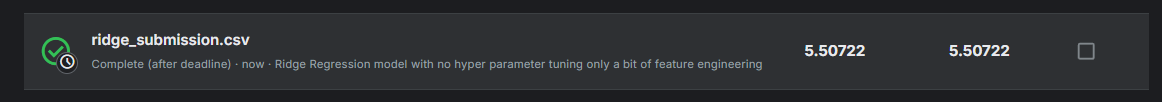

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model2 = RandomForestRegressor(max_depth=10, n_jobs= -1, random_state=24, n_estimators=50)

In [ ]:
%time
model2.fit(train_inputs, train_targets)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=24)

In [ ]:
evaluate(model2)

(4.133574268100621,
 4.429229746374939,
 array([ 6.13019557, 14.12253765, 11.01436022, ...,  7.22422096,
         5.7090857 ,  6.53203391]),
 array([ 8.17623316, 28.80613453,  5.30562446, ...,  9.93702713,
         5.15024388,  9.67001681]))

This model is able to get to an RMSE of $4.4, which is much better than both baseline model and Ridge regressior.

In [ ]:
predict_and_save(model2,'Random-Forest_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.726548
1,2015-01-27 13:08:24.0000003,10.938693
2,2011-10-08 11:53:44.0000002,4.937898
3,2012-12-01 21:12:12.0000002,8.798082
4,2012-12-01 21:12:12.0000003,16.510100
...,...,...
9909,2015-05-10 12:37:51.0000002,9.291312
9910,2015-01-12 17:05:51.0000001,13.255986
9911,2015-04-19 20:44:15.0000001,50.787182
9912,2015-01-31 01:05:19.0000005,23.233193


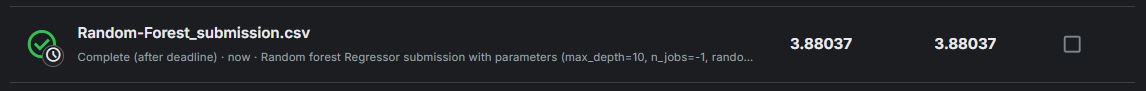

Remember that we're only using 1% of the data, and we haven't done much hyperparameter tuning yet.

### Gradient Boosting

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model3 = XGBRegressor(random_state=24, n_jobs=-1, objective='reg:squarederror')

In [ ]:
%%time
model3.fit(train_inputs, train_targets)

CPU times: user 4.73 s, sys: 17 ms, total: 4.74 s
Wall time: 2.46 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
evaluate(model3)

(4.139482641760625,
 4.555776867266023,
 array([ 6.3383985, 13.702608 , 10.021824 , ...,  6.8396635,  4.679287 ,
         6.91855  ], dtype=float32),
 array([ 7.429968, 29.183136,  5.091967, ...,  9.418748,  5.125287,
         9.731421], dtype=float32))

This model is able to get to an RMSE of $4.5, which is not better than Random Forest.

In [ ]:
predict_and_save(model3, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.788110
1,2015-01-27 13:08:24.0000003,11.104445
2,2011-10-08 11:53:44.0000002,4.188658
3,2012-12-01 21:12:12.0000002,8.973742
4,2012-12-01 21:12:12.0000003,16.992178
...,...,...
9909,2015-05-10 12:37:51.0000002,9.684016
9910,2015-01-12 17:05:51.0000001,12.228458
9911,2015-04-19 20:44:15.0000001,50.710896
9912,2015-01-31 01:05:19.0000005,23.799290


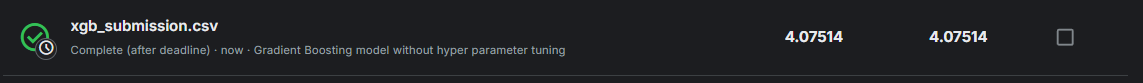

### SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR

In [ ]:
model4 = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', LinearSVR(random_state=42))
])

In [ ]:
%time
model4.fit(train_inputs, train_targets)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', LinearSVR(random_state=42))])

In [ ]:
evaluate(model4)

(5.517222151050152,
 5.7151510017044345,
 array([ 5.35896344, 15.24060629,  8.85198232, ...,  7.4010306 ,
         5.26471583,  5.92453936]),
 array([ 7.11908657, 30.66652013,  4.82831557, ...,  9.52476826,
         5.63948529,  9.27748098]))

In [ ]:
predict_and_save(model4, 'SVM_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.280281
1,2015-01-27 13:08:24.0000003,9.510166
2,2011-10-08 11:53:44.0000002,4.303193
3,2012-12-01 21:12:12.0000002,7.871703
4,2012-12-01 21:12:12.0000003,15.598273
...,...,...
9909,2015-05-10 12:37:51.0000002,8.935451
9910,2015-01-12 17:05:51.0000001,11.663183
9911,2015-04-19 20:44:15.0000001,47.483175
9912,2015-01-31 01:05:19.0000005,22.693562


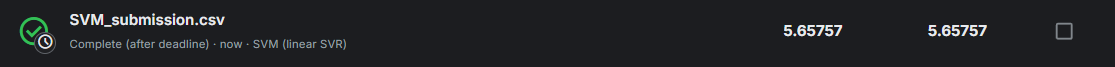

### KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model5 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_jobs=-1))
])

In [ ]:
model5.fit(train_inputs, train_targets)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(n_jobs=-1))])

In [ ]:
evaluate(model5)

(3.979764772177256,
 4.921128000418991,
 array([ 6.26, 16.68,  9.6 , ...,  7.6 ,  4.82,  6.82]),
 array([ 6.74 , 31.074,  4.9  , ...,  9.38 ,  8.2  ,  9.   ]))

This model is able to get to an RMSE of $4.9, which is not better than Random Forest.

In [ ]:
predict_and_save(model5, 'KNN_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,6.90
1,2015-01-27 13:08:24.0000003,6.90
2,2011-10-08 11:53:44.0000002,4.26
3,2012-12-01 21:12:12.0000002,10.60
4,2012-12-01 21:12:12.0000003,16.20
...,...,...
9909,2015-05-10 12:37:51.0000002,8.10
9910,2015-01-12 17:05:51.0000001,10.00
9911,2015-04-19 20:44:15.0000001,53.94
9912,2015-01-31 01:05:19.0000005,17.90


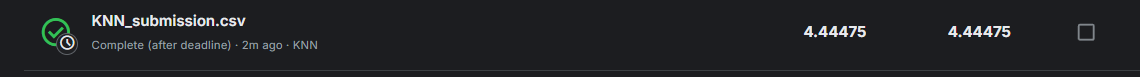

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model6 = DecisionTreeRegressor(random_state=42)

In [ ]:
model6.fit(train_inputs, train_targets)

DecisionTreeRegressor(random_state=42)

In [ ]:
evaluate(model6)

(0.27105475487640773,
 6.512542093434817,
 array([ 4.9, 18.5, 10. , ...,  5. ,  4.9,  7.3]),
 array([ 8.1 , 37.47,  4.9 , ...,  8.5 ,  6.5 ,  9.5 ]))

This model is able to get to an RMSE of $6.5, which is not better than Random Forest.

In [ ]:
predict_and_save(model6, 'Decision-Tree_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.0
1,2015-01-27 13:08:24.0000003,15.0
2,2011-10-08 11:53:44.0000002,2.9
3,2012-12-01 21:12:12.0000002,6.0
4,2012-12-01 21:12:12.0000003,10.9
...,...,...
9909,2015-05-10 12:37:51.0000002,8.0
9910,2015-01-12 17:05:51.0000001,12.5
9911,2015-04-19 20:44:15.0000001,5.5
9912,2015-01-31 01:05:19.0000005,31.0


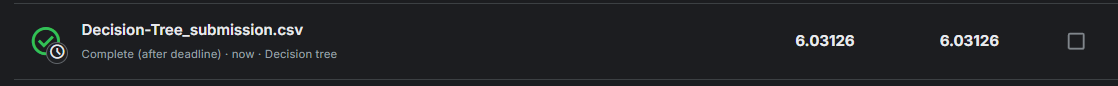